In [ ]:
import numpy as np
import pandas as pd
import cv2

from sklearn.utils import shuffle
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

import warnings

warnings.simplefilter('ignore')

In [ ]:
import zipfile
import os

zip_file_path = 'self-driving-cars.zip'
extract_dir = 'self-driving-cars'

# Check if the zip file exists
if os.path.exists(zip_file_path):
    # Create the extraction directory if it doesn't exist
    os.makedirs(extract_dir, exist_ok=True)
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print(f"Extracted {zip_file_path} to {extract_dir}")
else:
    print(f"Zip file not found at {zip_file_path}")

Extracted self-driving-cars.zip to self-driving-cars


In [ ]:
df = pd.read_csv('/content/self-driving-cars/labels_train.csv')
df = shuffle(df)
df.head()

,frame,xmin,xmax,ymin,ymax,class_id
93139,1479502558250801637.jpg,51,68,147,157,1
119084,1479505057918728159.jpg,275,296,157,179,1
92144,1479502498244759636.jpg,204,220,137,153,1
29135,1478732919096206897.jpg,403,419,143,158,1
11726,1478021597582001575.jpg,342,363,130,150,1


In [ ]:
!ls /content/self-driving-cars/

images	labels_train.csv  labels_trainval.csv  labels_val.csv


In [ ]:
classes = df.class_id.unique()
print(classes)

[1 2 3 5 4]


In [ ]:
labels = { 1:'car', 2:'truck', 3:'person', 4:'bicycle', 5:'traffic light'}

In [ ]:
# Get path images and boxes (x,y) for each class_id
boxes = {}
images = {}

base_path = '/content/self-driving-cars/images/'

for class_id in classes:
    first_row = df[df['class_id'] == class_id].iloc[0]

    images[class_id] = cv2.imread(base_path + first_row['frame'])
    boxes[class_id] = [first_row['xmin'],first_row['xmax'],first_row['ymin'],first_row['ymax']]

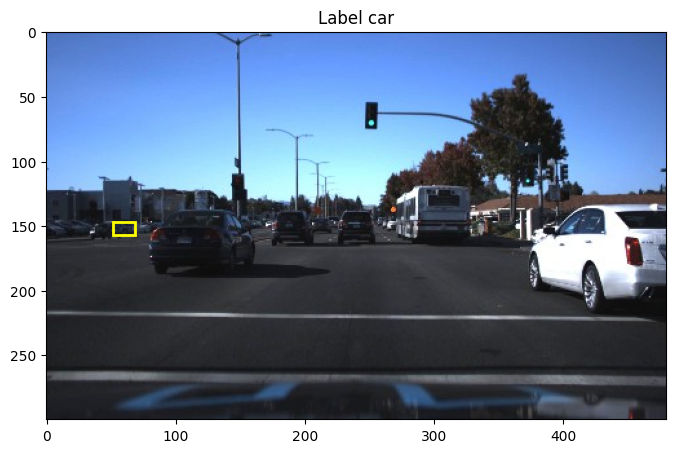

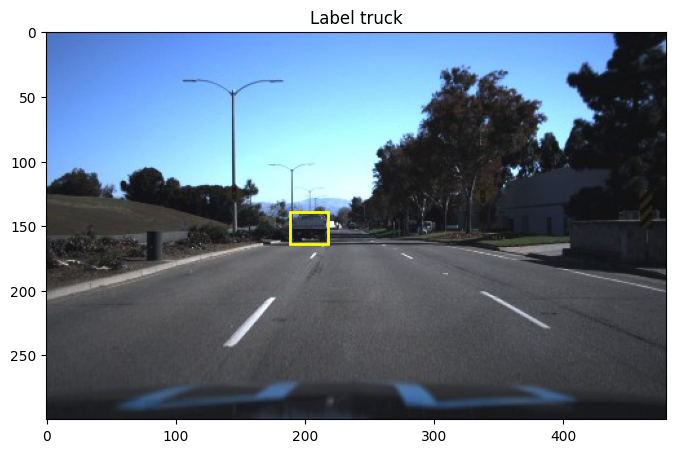

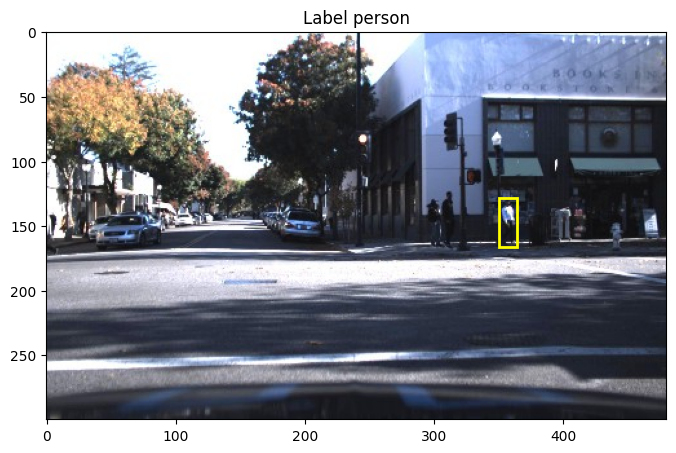

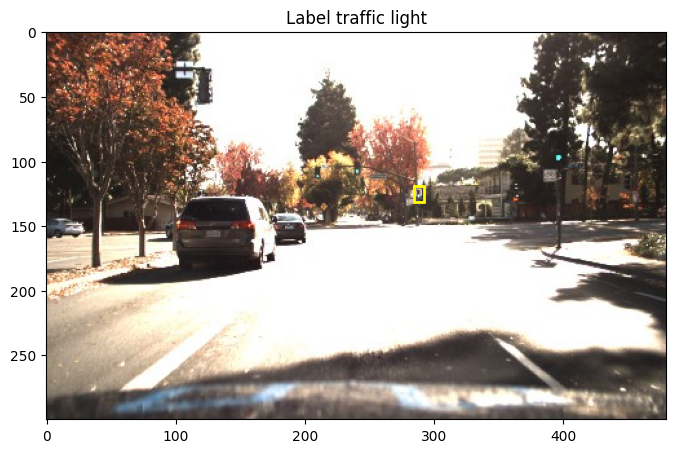

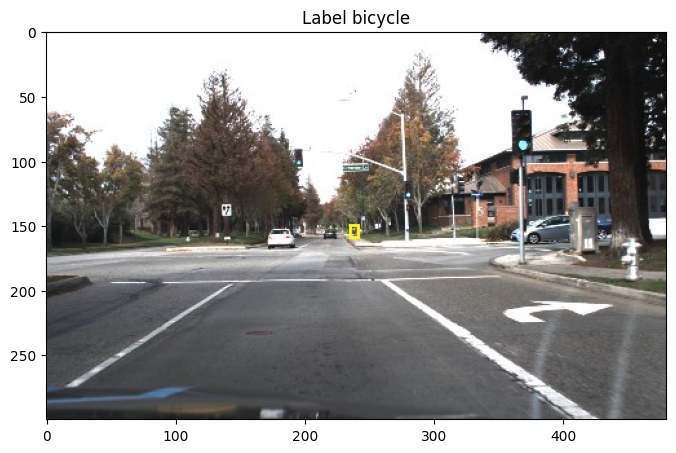

In [ ]:
for i in classes:

    xmin, xmax, ymin, ymax = boxes[i][0], boxes[i][1], boxes[i][2], boxes[i][3]

    plt.figure(figsize=(8, 10))
    plt.title("Label " + labels[i])

    # Convert the image from BGR to RGB format for matplotlib
    img_rgb = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)

    plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color='yellow', fill=False, linewidth=2))

    plt.show()

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.6 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import PIL
from PIL import Image
from IPython.display import display
import os
import pathlib

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model = YOLO("yolov8m.pt")

In [ ]:
results=model.predict(source="self-driving-cars/images/1478019956680248165.jpg",
              save=True, conf=0.2,iou=0.5)


image 1/1 /content/self-driving-cars/images/1478019956680248165.jpg: 416x640 1 car, 1 truck, 1217.7ms
Speed: 12.7ms preprocess, 1217.7ms inference, 38.7ms postprocess per image at shape (1, 3, 416, 640)
Results saved to /content/runs/detect/predict


In [ ]:
result = results[0]
box = result.boxes[0]

In [ ]:
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs

In [ ]:
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 2.0
Coordinates: [124.69143676757812, 142.6882781982422, 148.7809295654297, 162.10047912597656]
Probability: 0.7161701321601868


In [ ]:
for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

Object type: car
Coordinates: [125, 143, 149, 162]
Probability: 0.72
---
Object type: truck
Coordinates: [141, 139, 157, 154]
Probability: 0.31
---


In [ ]:
results1 = model.predict(source="self-driving-cars/images/1478020211690815798.jpg",
              save=True, conf=0.2,iou=0.5)

Results = results1[0]


image 1/1 /content/self-driving-cars/images/1478020211690815798.jpg: 416x640 4 cars, 3 traffic lights, 945.8ms
Speed: 3.8ms preprocess, 945.8ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 640)
Results saved to /content/runs/detect/predict


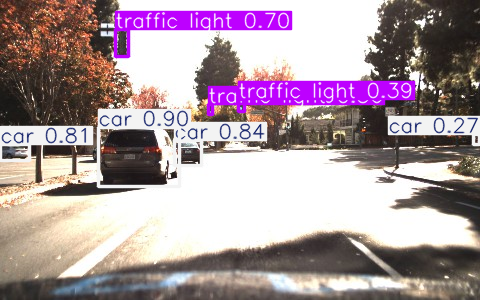

In [ ]:
# Plotting results
plot = results1[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))